In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class UnionFind:
    def __init__(self, n):
        self.parent = {}
        self.rank = {}

        for i in range(n):
            self.parent[i] = i
            self.rank[i] = 0

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)

        if root_x != root_y:
            if self.rank[root_x] < self.rank[root_y]:
                self.parent[root_x] = root_y
            elif self.rank[root_x] > self.rank[root_y]:
                self.parent[root_y] = root_x
            else:
                self.parent[root_y] = root_x
                self.rank[root_x] += 1


def kruskal(graph):
    edges = []
    nodes = {}
    index = 0

    for u in graph:
        nodes[u] = index
        index += 1
        for v, w in graph[u].items():
            edges.append((w, u, v))

    edges.sort()

    num_vertices = len(graph)
    mst = []
    uf = UnionFind(num_vertices)

    for w, u, v in edges:
        u_index = nodes[u]
        v_index = nodes[v]

        if uf.find(u_index) != uf.find(v_index):
            uf.union(u_index, v_index)
            mst.append((u, v, w))

    return mst

def visualize_graph(graph, node_positions, minimum_spanning_tree=None):
    G = nx.Graph()

    for u in graph:
        for v, w in graph[u].items():
            G.add_edge(u, v, weight=w)

    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx(G, pos=node_positions, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=labels)

    if minimum_spanning_tree:
        mst_edges = [(u, v) for u, v, _ in minimum_spanning_tree]
        non_mst_edges = [edge for edge in G.edges() if edge not in mst_edges]
        nx.draw_networkx_edges(G, pos=node_positions, edgelist=mst_edges, edge_color='red', width=2.0)
        nx.draw_networkx_edges(G, pos=node_positions, edgelist=non_mst_edges, edge_color='black', width=1.0)

    plt.title("Minimum Spanning Tree")
    plt.show()
    

In [3]:
# Define the graph
graph = {
    'A': {'C': 4, 'B': 8},
    'B': {'A': 8, 'C': 11, 'D': 7, 'E': 1},
    'C': {'A': 4, 'B': 11, 'F': 8},
    'D': {'B': 7, 'E': 6, 'F': 2},
    'E': {'B': 1, 'D': 6, 'G': 2},
    'F': {'C': 8, 'D': 2, 'G': 4, 'H': 7},
    'G': {'E': 2, 'F': 4, 'I': 10},
    'H': {'F': 7, 'I': 9},
    'I': {'G': 10, 'H': 9}
}

In [4]:
# Manually specify the positions of the nodes and rotate 90 degrees to the left
node_positions = {
    'A': (-1, 5),
    'B': (-2, 4),
    'C': (0, 4),
    'D': (-1, 3),
    'E': (-2, 2),
    'F': (0, 2),
    'G': (-2, 1),
    'H': (0, 1),
    'I': (-1, 0)
}

In [5]:
minimum_spanning_tree = kruskal(graph)

print("Minimum Spanning Tree according to Kruskal:")
for u, v, w in minimum_spanning_tree:
    print(f"Edge: {u} -- {v}, Weight: {w}")

Minimum Spanning Tree according to Kruskal:
Edge: B -- E, Weight: 1
Edge: D -- F, Weight: 2
Edge: E -- G, Weight: 2
Edge: A -- C, Weight: 4
Edge: F -- G, Weight: 4
Edge: F -- H, Weight: 7
Edge: A -- B, Weight: 8
Edge: H -- I, Weight: 9


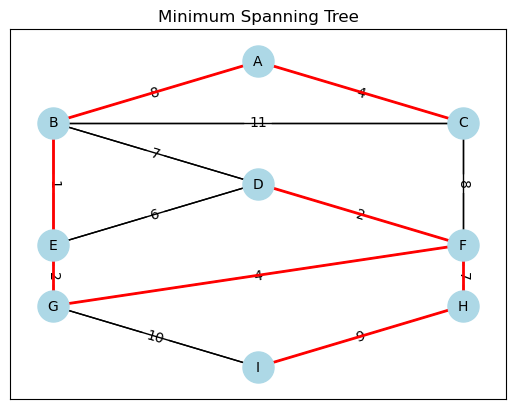

In [6]:
visualize_graph(graph, node_positions, minimum_spanning_tree)